$\textbf{The Cellar}:$ Neglecting the curvature of the Earth and the diurnal (daily) variation of temperature, the distribution of temperature $u(t, x)$ at a depth $x$ and a time $t$ is given by the Heat equation:

\begin{equation}
\frac{ \partial u}{ \partial t} = \kappa \frac{\partial^2 u}{\partial x^2} \qquad (1)
\end{equation}


Here $\kappa$ is thermometric diffusivity of soil whose value is approximately $\kappa = 2 * 10^{-3} \text{cm}^2/\text{sec}$ (the fundamental time scale is a year, $3.15 \times 10^7 sec$. Assume the temperature at the surface of the Earth ($x = 0$) has a simple sinusoidal variation, $u(t, 0) = A \text{sin}(2\pi t/Y )$, with a period of one year $Y$ . The temperature $u$ should decay to zero as $x \to \infty$.

> (a) Show that the backward (implicit Euler) difference scheme for (1) is consistent and unconditionally stable. What is the order of the scheme?

> (b) Implement the backward difference scheme to find a numerical approximation to (1). Consider the initial condition $u(t_0,x) = u(t_0,0)e^{q_1x}$, where $q_1 = 0.71m^{-1}$ and $t_0$ is your initial time. For your computational spatial domain take a suffciently long interval so that the right-end boundary condition $u = 0$ can be used. Select $\Delta t$ and $\Delta x$ small enough to resolve well the numerical solution. Plot the numerical solution at several times.

> (c) From your numerical solution, find (e.g. graphically) the depth $x^{\star}$ at which the temperature is opposite in phase to the surface temperature, i.e, it is summer at $x^{\star}$ when is winter at the surface. Note that the temperature variation at $x^{\star}$ is much smaller than that at the surface. This makes the depth $x^{\star}$ ideal for a wine cellar or vegetable storage.


We will start answering this project by showing that the backward time difference scheme is consistent and unconditionally stable. 

**Consistency** means that for the given system of equations (in our case, non-linear), there exist at least one set of values for the unknowns that satisfies each equation in the system. This is important to prove because we need consistency in our system to produce an accurate approximations of the Heat Equation. 

Backward Difference Scheme (Implicit Euler) can be written as
$$ \frac{ u_j^{n+1} - u_j^n }{\Delta t} = D \frac{ u_{j+1}^{n+1} - 2u_{j}^{n+1} + u_{j-1}^{n+1} }{ (\Delta x)^2 } \qquad (\star) $$

Furhter, 
\begin{equation}
\begin{split}
u_t(t_{n+1}, x_j) & = \frac{ u_j^{n+1} - u_j^n }{\Delta t}\\
u_{xx}(t_{n+1}, x_j) & = \frac{ u_{j+1}^{n+1} - 2u_{j}^{n+1} + u_{j-1}^{n+1} }{ (\Delta x)^2 }
\end{split}
\end{equation}

To check the $\textbf{consistency}$ of the backward difference scheme, we will use taylor series and the definition of truncation error. The Local Truncation for Backward Difference scheme at $(t_{n+1}, x_j)$ becomes 

$$\tau_{j}^{n+1}(\Delta t, \Delta x) = \frac{ u_j^{n+1} - u_j^n }{\Delta t} - \frac{ u_{j+1}^{n+1} - 2u_{j}^{n+1} + u_{j-1}^{n+1} }{ (\Delta x)^2 } $$


Let us expand the terms in the backward difference scheme one by one using Taylor series expansion centered at $(t_{n+1}, x_j)$. We will get 

\begin{equation}
\begin{split}
u(t_n, x_j) & = u(t_{n+1}, x_j) - (\Delta t) u_t(t_{n+1}, x_j) + \frac{(\Delta t)^2}{2!} u_{tt}(t_{n+1}, x_j) + O(\Delta t)^3\\
u(t_{n+1}, x_{j-1}) & = u(t_{n+1}, x_j) - (\Delta t) u_x(t_{n+1}, x_j) + \frac{(\Delta t)^2}{2!} u_{xx}(t_{n+1}, x_j) - \frac{(\Delta t)^2}{3!} u_{xxx}(t_{n+1}, x_j) + \\ &\qquad \qquad\qquad\qquad \frac{(\Delta t)^2}{4!}u_{xxxx}(t_{n+1}, x_j) + O(\Delta x)^5 \\
u(t_{n+1}, x_{j+1}) & = u(t_{n+1}, x_j) + (\Delta t) u_x(t_{n+1}, x_j) + \frac{(\Delta t)^2}{2!} u_{xx}(t_{n+1}, x_j) + \frac{(\Delta t)^2}{3!} u_{xxx}(t_{n+1}, x_j) + \\ &\qquad \qquad\qquad\qquad \frac{(\Delta t)^2}{4!} u_{xxxx}(t_{n+1}, x_j) +  O(\Delta x)^5 
\end{split}
\end{equation}

We can subsitute the above expanded terms in the first half of the LTE as 

\begin{equation}
\frac{ u_j^{n+1} - u_j^n }{\Delta t} =   u_t(t_{n+1}, x_j) - \frac{(\Delta t)}{2!} u_{tt}(t_{n+1}, x_j) + O(\Delta t)^2 
\end{equation}

and 
\begin{equation}
\begin{split}
D \bigg( \frac{ u_{j+1}^{n+1} - 2u_{j}^{n+1} + u_{j-1}^{n+1} }{ (\Delta x)^2 } \bigg)  = \frac{D}{(\Delta x)^2} \bigg(  u(t_{n+1}, x_j) & + (\Delta x) u_x(t_{n+1}, x_j) + \frac{(\Delta x)^2}{2!} u_{xx}(t_{n+1}, x_j)  \\ + \frac{(\Delta x)^3}{3!} u_{xxx}(t_{n+1}, x_j) + \frac{(\Delta x)^4}{4!} u_{xxxx}(t_{n+1}, x_j) & - 2u(t_{n+1}, x_j) + u(t_{n+1}, x_j) - (\Delta x) u_x(t_{n+1}, x_j) \\ + \frac{(\Delta x)^2}{2!} u_{xx}(t_{n+1}, x_j)  - \frac{(\Delta x)^3}{3!} u_{xxx}(t_{n+1}, x_j) &  +  \frac{(\Delta x)^4}{4!}u_{xxxx}(t_{n+1}, x_j) \\ + O(\Delta x)^5 \bigg) 
\end{split}
\end{equation}


We can cancel/combine the like terms to get 

$$ D \bigg( \frac{ u_{j+1}^{n+1} - 2u_{j}^{n+1} + u_{j-1}^{n+1} }{ (\Delta x)^2 } \bigg)  =  D \bigg( (\Delta x)^2 u_{xx}(t_{n+1}, x_j) + \frac{(\Delta x)^4}{12}u_{xxxx}(t_{n+1}, x_j) + O(\Delta x)^5 \bigg) $$

Now, putting it all togther, we have 
\begin{equation}
\begin{split}
\tau_{j}^{n+1}(\Delta t, \Delta x) &=  \underbrace{u_t (t_{n+1}, x_j)}_{cancels} - \frac{(\Delta t)}{2!} u_{tt}(t_{n+1}, x_j) + O(\Delta t)^2 -  \\ &\qquad \qquad\qquad\qquad D \bigg( \underbrace{u_{xx}(t_{n+1}, x_j)}_{cancels} + \frac{(\Delta x)^2}{12}u_{xxxx}(t_{n+1}, x_j) + O(\Delta x)^3 \bigg)\\
\tau_{j}^{n+1}(\Delta t, \Delta x) &=   - \frac{(\Delta t)}{2!} u_{tt}(t_{n+1}, x_j) + O(\Delta t)^2 -  D \bigg( \frac{(\Delta x)^2}{12}u_{xxxx}(t_{n+1}, x_j) + O(\Delta x)^3 \bigg)
\end{split}
\end{equation}

Hence $\tau_{j}^{n+1}(\Delta t, \Delta x) \to 0$ as $\Delta t \to 0$ and $\Delta x \to 0$.

Therefore, this proves that Backward Difference Time Method is consistency at all points.

From the above equation, we can infer that the order of the scheme is $O(\Delta t)^2, (\Delta x^3))$.

Now, let's check the $\textbf{convergence}$ of the given scheme.

Let$\alpha = \frac{D \Delta t}{(\Delta x)^2}$. Then above can also be written as 
$$ u_j^{n+1} = u_j^{n} + \alpha \bigg( u_{j-1}^{n+1} - 2 u_{j}^{n+1} + u_{j+1}^{n+1}\bigg) $$
$$ \Rightarrow u_j^{n+1} - u_j^{n} = \alpha \bigg( u_{j-1}^{n+1} - 2 u_{j}^{n+1} + u_{j+1}^{n+1}\bigg) $$

We can do von Neunmann analysis on the backward difference scheme to prove that (1) is unconditionally stable.

Subsitute $u_M^n = \xi^n e^{ikj\Delta x}$ in the above equation.
$$ \Rightarrow \xi^{n+1} e^{ik(j+1)\Delta x} - \xi^n e^{ikj\Delta x} = \alpha \bigg(\xi^{n+1} e^{ik(j+1)\Delta x} - 2\xi^{n+1} e^{ikj\Delta x} + \xi^{n+1} e^{ik(j-1)\Delta x} \bigg)$$
Dividing by $\xi^{n}e^{ikj\Delta x}$
$$ \Rightarrow \xi - 1 = \alpha \xi \bigg( e^{-ik\Delta x} -2 + e^{ik\Delta x} \bigg) $$

$$ \Rightarrow \xi \bigg( 1-2\alpha (\text{cos}(k \Delta x) -1 ) \bigg) = 1 $$
$$ \Rightarrow \xi \bigg( 1-2\alpha (-\text{sin}^2( \frac{k \Delta x}{2})) \bigg) = 1 $$
$$ \Rightarrow \xi = \frac{1}{1 + 4 \alpha \text{sin}^2(\frac{k\Delta x}{2})  } $$
Note that $\alpha > 0$ and $\text{sin}^2(a) \geq 1\quad \forall\ a\ \in \mathcal{R}$

Then, 
$$ \xi \leq \frac{1}{1+0} = 1 $$

This is exactly what we need to show to prove that the scheme is $\textbf{unconditionally stable}$.

Before jumping into the implementation of the implicit Backward Time difference method, we will perform simplification of the method to ease the coding. 

Implicit Euler Backward time difference scheme can be written as
$$ u_j^{n+1} - u_j^n = \alpha ( u_{j-1}^{n+1} - 2u_j^{n+1} + u_{j+1}^{n+1} ) $$


For $j=1$,
$$  (1 + 2\alpha) u_1^{n+1} -  \alpha u_{2}^{n+1}  = u_{1}^{n}  + \underbrace{\alpha u_{0}^{n+1}}_{\text{initial condition}} $$


For $j=2, \ldots, M-2$,
$$ - \alpha u_{j-1}^{n+1} + (1 + 2\alpha) u_j^{n+1} -  \alpha u_{j+1}^{n+1}  = u_{j}^{n} $$
$$ \vdots $$
$$ \vdots $$

For $j=M-1$
$$ - \alpha u_{M-2}^{n+1} + (1 + 2\alpha) u_{M-1}^{n+1} -  \underbrace{\alpha u_{M}^{n+1}}_{\text{boundary condition}}  = u_{M-1}^{n} $$

We can represent the above equations as a system of linear equations.

Let $u^n = \begin{pmatrix} u_1^n \\ u_2^n \\ \vdots \\ u_{M-2}^n  \end{pmatrix}$.

Then 
$$ u^{n+1} - u^n =  \underbrace{
\begin{pmatrix} 
1+2 \alpha & -\alpha & 0 & \ldots & 0 & 0 & 0 \\
-\alpha & 1+2 \alpha & -\alpha & \ldots & 0 & 0 & 0 \\
0 & -\alpha & 1+2 \alpha & \ldots & 0 & 0 & 0\\
 & \vdots & & & & \vdots & & \\
0 & 0 & 0 & \ldots & 1+2 \alpha & -\alpha & 0\\
0 & 0 & 0 & \ldots & -\alpha & 1+2 \alpha & -\alpha\\
0 & 0 & 0 & \ldots & 0 & -\alpha & 1+2 \alpha
\end{pmatrix}}_{\Large{A}}u^{n+1} $$

$$ \Rightarrow u^{n+1} - u^n = Au^{n+1} $$ 

Thus 
$$ \Rightarrow (I - A)u^{n+1} = u^n \qquad (\star \star)$$

Instead of solving the equation of backward time difference scheme, we only need to calculate a tridiagonal system of equations. This makes our computational load much lighter.

In [1]:
# Importing the libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from copy import deepcopy

The below code block constructs the tridiagonal matrix, $(\star \star)$.

In [2]:
# Defining the Tridiagonal Matrix
def construct_tridiagonal_matrix(n, alpha):
    A = 2 * np.eye(n)
    for i in range(0, n-1):
        A[i][i+1] = -1
        A[i+1][i] = -1
    
    return np.eye(n) + alpha * A

n = 5
alpha = 0.25
matrix = construct_tridiagonal_matrix(n, alpha)
print("Thus we have our matrix A ready with the choice of alpha = ", alpha, ".\n\n", matrix)

Thus we have our matrix A ready with the choice of alpha =  0.25 .

 [[ 1.5  -0.25  0.    0.    0.  ]
 [-0.25  1.5  -0.25  0.    0.  ]
 [ 0.   -0.25  1.5  -0.25  0.  ]
 [ 0.    0.   -0.25  1.5  -0.25]
 [ 0.    0.    0.   -0.25  1.5 ]]


The below code block is for the tridiagonal solver that we need to implement our backward time difference scheme.

In [3]:
# Algorithm to solve the tridiagonal matrix
def thomas_alorithm(A, B):
    A = deepcopy(A)
    B = deepcopy(B)
    
    n = len(A)
    
    a,b,c = map(np.array,  ([A[i+1][i] for i in range(n-1)],
                                [A[i][i] for i in range(n)],
                                [A[i][i+1] for i in range(n-1)]))
    d = B
        
    for j in range(1,n):
        w = a[j-1] / b[j-1]
        b[j] -= w * c[j-1]
        d[j] -= w * d[j-1]
            
    result = b
    result[-1] = d[-1] / b[-1]

    for j in range(n-2, -1, -1):
        result[j] = (d[j] - c[j]* result[j+1])/b[j]
            
    return result

A = np.array([[10,2,0,0],[3,10,4,0],[0,1,7,5],[0,0,3,4]],dtype=float)   
d = np.array([3,4,5,6.])

print("Using Thomas Algorithm, we get the result ", thomas_alorithm(A, d), " and using linear algebra solver, we get ", np.linalg.solve(A, d))

Using Thomas Algorithm, we get the result  [ 0.14877589  0.75612053 -1.00188324  2.25141243]  and using linear algebra solver, we get  [ 0.14877589  0.75612053 -1.00188324  2.25141243]


The below code block intialize the first array (vector) for the scheme, the temperature at the surface of the earth at the initial time.

In [4]:
def calculate_u_t(t):
    A = 20
    q_1 = 0.71
    Y = 3.15e7
    u_t = A*np.sin(2 * np.pi * t / Y) 
    
    return u_t


def calculate_u_init(t, x_values):
    A = 20
    q_1 = 0.71
    Y = 3.15e7
    u_init = calculate_u_t(t) * np.exp(-q_1 * x_values)
    
    return u_init

# x_values is the distance (in meters) from the surface of the Earth
x_values = np.linspace(0, 10, 51)
t_0 = 0.0                           # t_0 is the initial temperature at the surface of the Earth
Y = 3.15e7

u_init = calculate_u_init(t_0, x_values)
# print(u_init)

Below is the code for Backward difference Scheme function.

In [5]:
kappa = (2e-3) * (1e-4)
delta_x = x_values[1] - x_values[0]
delta_t = Y/500      # 500 reperesents the number of points we are going to consider
alpha = kappa * delta_t/(delta_x**2)


def backward_fd(t_0, u_init, alpha, delta_t, N, timesteps_to_display):
    M = len(u_init)
    t_curr = t_0
    
    u_curr = u_init[1:-1]
    A = construct_tridiagonal_matrix(M-2, alpha)
    
    results = []
    
    if 0 in timesteps_to_display:
        results.append(deepcopy(u_curr))
    
    for i in range(1, N+1):
        t_curr += delta_t
        
        b = u_curr
        b[0] += alpha*calculate_u_t(t_curr)
        
        u_curr = thomas_alorithm(A, b)
        
        if i in timesteps_to_display:
            result = np.concatenate(( [calculate_u_t(t_curr)], u_curr, [0.01]))
            results.append(result)
            
    return results
                
timesteps_to_display = np.zeros(101)
for i in range(101):
    timesteps_to_display[i] = int(i * 5)

u_approxs = backward_fd(t_0, u_init, alpha, delta_t, 1000, timesteps_to_display)

Below are the plots for the approximations that we calculated for the problem. 

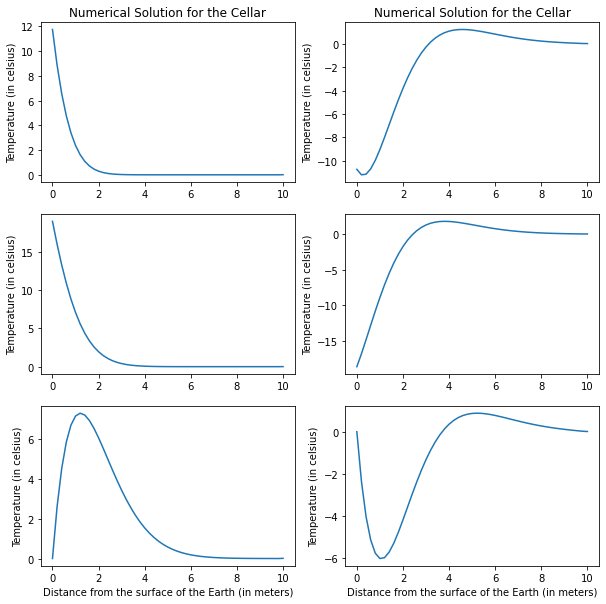

In [6]:
number_of_plots = 5

fig, axs = plt.subplots(3, 2, figsize = (10, 2*number_of_plots))
temp_to_display = [10, -10, 20, -20, 50, 100]

axs[0, 0].set_title('Numerical Solution for the Cellar')
axs[0, 0].set_ylabel('Temperature (in celsius)')
axs[0, 0].plot(x_values, u_approxs[temp_to_display[0]])
axs[0, 1].set_title('Numerical Solution for the Cellar')
axs[0, 1].set_ylabel('Temperature (in celsius)')
axs[0, 1].plot(x_values, u_approxs[temp_to_display[1]])
axs[1, 0].set_ylabel('Temperature (in celsius)')
axs[1, 0].plot(x_values, u_approxs[temp_to_display[2]])
axs[1, 1].set_ylabel('Temperature (in celsius)')
axs[1, 1].plot(x_values, u_approxs[temp_to_display[3]])
axs[2, 0].set_ylabel('Temperature (in celsius)')
axs[2, 0].set_xlabel('Distance from the surface of the Earth (in meters)')
axs[2, 0].plot(x_values, u_approxs[temp_to_display[4]])
axs[2, 1].set_ylabel('Temperature (in celsius)')
axs[2, 1].set_xlabel('Distance from the surface of the Earth (in meters)')
axs[2, 1].plot(x_values, u_approxs[temp_to_display[5]])

Now, to determine the depth at which the temperature is opposite in phase to the surface temperature, we  observe the plots.

For example, if we look at the first plot, which has the initial temperature of $10^o$ Celsius on the surface of the Earth, the oppposite phase to it would be a temp near $10^o$ Celsius, which is observed to be between $3$ and $4$ meters from the surface of the Earth. 

Similarly, if we look at the second plot which has the initial temperature of approximately $-11^o$ Celsius on the surface of the Earth, then the opposite phase to it would be a temperature above $0^o$ Celsius which is between $3$ and $4$ meters from the surface of the Earth.

Looking at the other plots, we can conclude that the opposite phase to the surface temperature is occuring at approximately between 3 and 4 meters from the surface of the Earth.